# Day_064

In [1]:
# import OpenCV library
import cv2
# import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1, minNeighbors = 5):
    # just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()  
    
    # convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
    
    # let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor = scaleFactor, minNeighbors = minNeighbors); 
    
    # go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2) 
        #let's detect multiscale (some images may be closer to camera than others) images 
   
    print('Faces found: ', len(faces))
    return img_copy

### 練習時間 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor = 1.1, minNeighbors = 5);   
   修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉    
2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 

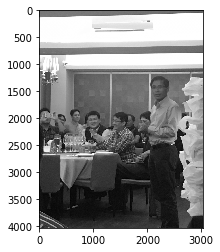

In [4]:
#load test iamge
test5 = cv2.imread('D:/Coding Project/GitHub/ML100-Days\data/Topic_6/test5.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test5, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [5]:
# load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('D:/Coding Project/GitHub/ML100-Days/data/Topic_6/haarcascade_frontalface_alt.xml')
lbp_cascade = cv2.CascadeClassifier('D:/Coding Project/GitHub/ML100-Days/data/Topic_6/lbpcascade_frontalcatface.xml')

Faces found:  4


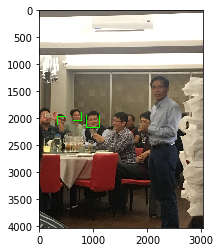

In [6]:
# call our function to detect faces 
haar_face_detected_img = detect_faces(haar_face_cascade, test5)  
 
# convert image to RGB and show image 
plt.imshow(convertToRGB(haar_face_detected_img))

Faces found:  0


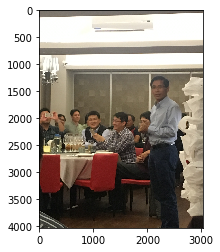

In [7]:
# call our function to detect faces 
lbp_cascade_detected_img = detect_faces(lbp_cascade, test5)  
 
# convert image to RGB and show image 
plt.imshow(convertToRGB(lbp_cascade_detected_img))

#### 用 haar_face_cascade training 的模型效果比 lbp_cascade 好